In [48]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
from datetime import datetime
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [49]:
target_media = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
results_list = []
media_org = []
text = []
date = []
tweets_ago = []

for media in target_media:
    tweet_count = 0
    for x in range(5):
        
        public_tweets = api.user_timeline(media, page=x)
        for tweet in public_tweets:
            tweet_count += 1
            
            media_org.append(media)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
            
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)
        
 

In [55]:
Media_tweets = pd.DataFrame({"Media": media_org, "Tweet": text, "Date & Time (UTC)": date,
    "Compound Score": compound_list, "Positive Score": positive_list,
    "Neutral Score": neutral_list, "Negative Score": negative_list,
    "Tweets Ago": tweets_ago})

Media_tweets = Media_tweets[["Media", "Tweet", "Date & Time (UTC)", "Compound Score",
                         "Positive Score", "Negative Score",
                         "Neutral Score", "Tweets Ago"]]

Media_tweets.to_csv("Media_Tweet_Sentiments.csv", index=False)
Media_tweets.head()

,Media,Tweet,Date & Time (UTC),Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@BBCWorld,Minnesota town alerts residents over 'tipsy' b...,Thu Oct 04 16:07:21 +0000 2018,0.0000,0.000,0.000,1.000,1
1,@BBCWorld,Staff working to keep Palu's airport open afte...,Thu Oct 04 15:51:25 +0000 2018,0.0000,0.000,0.000,1.000,2
2,@BBCWorld,Senators spar over FBI report on Kavanaugh \n\...,Thu Oct 04 15:47:34 +0000 2018,0.0000,0.000,0.000,1.000,3
3,@BBCWorld,Archibald Knox exhibition: Liberty designer's ...,Thu Oct 04 15:32:53 +0000 2018,0.7964,0.504,0.000,0.496,4
4,@BBCWorld,"""Without zoos nature will be doomed"" - @NatGeo...",Thu Oct 04 15:03:11 +0000 2018,-0.6369,0.000,0.198,0.802,5


In [51]:
Media_tweets.info

<bound method DataFrame.info of          Media                                              Tweet  \
0    @BBCWorld  Minnesota town alerts residents over 'tipsy' b...   
1    @BBCWorld  Staff working to keep Palu's airport open afte...   
2    @BBCWorld  Senators spar over FBI report on Kavanaugh \n\...   
3    @BBCWorld  Archibald Knox exhibition: Liberty designer's ...   
4    @BBCWorld  "Without zoos nature will be doomed" - @NatGeo...   
5    @BBCWorld  RT @BBCTech: Fitbit data used to charge US man...   
6    @BBCWorld  RT @bbcworldservice: The first 'exomoon' (that...   
7    @BBCWorld  Julia Roberts: If Brett Kavanaugh gets on to t...   
8    @BBCWorld  Drew Barrymore: 'Surreal' article defended by ...   
9    @BBCWorld  How credible are lie detector tests? https://t...   
10   @BBCWorld  The staff working tirelessly to keep Palu's ba...   
11   @BBCWorld  "Russia decided that it was fair game to flood...   
12   @BBCWorld  RT @BBCBreaking: US charges seven Russian mili...   
13

In [52]:
bbc = Media_tweets.loc[Media_tweets["Media"] == "@BBCWorld"]
cbs = Media_tweets.loc[Media_tweets["Media"] == "@CBSNews"]
cnn = Media_tweets.loc[Media_tweets["Media"] == "@CNN"]
fox = Media_tweets.loc[Media_tweets["Media"] == "@FoxNews"]
nyt = Media_tweets.loc[Media_tweets["Media"] == "@nytimes"]



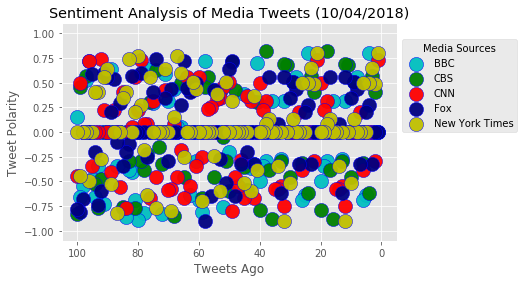

In [53]:
plt.scatter(bbc['Tweets Ago'], bbc["Compound Score"], c='c',edgecolor='b', s=200, alpha=0.95, label='BBC')
plt.scatter(cbs['Tweets Ago'], cbs["Compound Score"], c='g',edgecolor='b', s=200, alpha=0.95, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn["Compound Score"], c='r',edgecolor='b', s=200, alpha=0.95, label='CNN')
plt.scatter(fox['Tweets Ago'], fox["Compound Score"], c='navy',edgecolor='b', s=200, alpha=0.95, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt["Compound Score"], c='y',edgecolor='b', s=200, alpha=0.95, label='New York Times')


plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')

plt.savefig("Sentiment Analysis of Media Tweets.png", bbox_inches="tight")
plt.show()


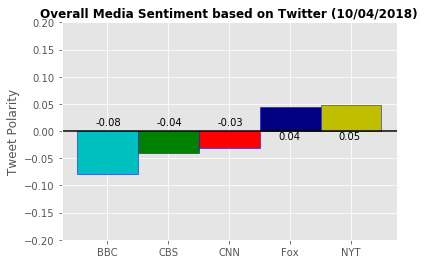

In [54]:
plt.bar(0, bbc['Compound Score'].mean(), color='c', edgecolor='b', width=1)
plt.bar(1, cbs['Compound Score'].mean(), color='g', edgecolor='b', width=1)
plt.bar(2, cnn['Compound Score'].mean(), color='r', edgecolor='b', width=1)
plt.bar(3, fox['Compound Score'].mean(), color='navy', edgecolor='b', width=1)
plt.bar(4, nyt['Compound Score'].mean(), color='y', edgecolor='b', width=1)

plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),
                                                                           fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

for a,b in zip(np.arange(5), [bbc['Compound Score'].mean(),cbs['Compound Score'].mean(), 
                              cnn['Compound Score'].mean(),
                             fox['Compound Score'].mean(),nyt['Compound Score'].mean()]):
    if b > 0:
        plt.text(a-0.2,b-b-0.015,str(round(b,2)))
    else:
        plt.text(a-0.2,b-b+0.01,str(round(b,2)))             
        
        
plt.savefig("Overall Media Sentiment.png")
plt.show()